# k-Means

## Method

Because of the excellent speed and good expandability，K-Means cluster method is regarded as the most famous cluster method。***K-Means algorthms is a process which repeatly moves the center point，moving the center point of the class which is called centroids to the average position of all other members，and redivide the members of it.***

K is the hyper-parameter which has been calculated, represents the numbers of class. K-means can distribute sample into different class automatically, without deciding the numbers of the class.

K must be a positive integer smaller than the number of samples in the training set. Sometimes, the number of classes is specified by the content of the question. For example, a shoe factory has three new styles. It wants to know which potential customers each new style has, so it investigates customers and then finds out three types from the data. 

The parameter of K-Means is the centriod positon of class and the position of its internal observation. Similar with generalized linear models and decision tree, the optimal solution of k-means parameter is also the goal of minimizing the cost function. The cost function of K-Means is
：
$$
J = \sum_{k=1}^{K} \sum_{i \in C_k} | x_i - u_k|^2
$$

$u_k$is the centriod poisition of samples from type $C_k$ with the definition of：
$$
u_k = \frac{1}{|C_k|} \sum_{x \in C_k} x
$$

Cost is the sum of each class distortions. Every class distortion equal to the sum of quare between centroids of this class and its inner members. The more compact the members inside the class are, the less the class distorts. On the contrary, the more disperse the members are more distort. 

The argument for minimizing the cost function is a process of repeatedly configuring the observations contained in each class and constantly moving the class's ctriod.
1. Firstly, class centriod is a random determined poisition. In fact, the poisition of centriod equal to observed value which being determined radomly.首
2. At each iteration, K-Means will assigns the observations to the class closest to them and move the centriod to the average value of all class members.
3. If the maximum number of iteration steps is reached or the difference between two iterations is less than the set threshold, the algorithm is finished, otherwise repeat step 2.



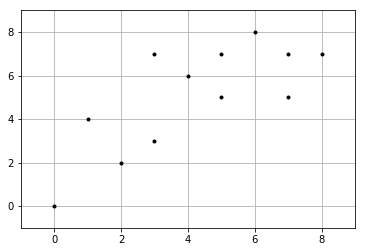

In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

X0 = np.array([7, 5, 7, 3, 4, 1, 0, 2, 8, 6, 5, 3])
X1 = np.array([5, 7, 7, 3, 6, 4, 0, 2, 7, 8, 5, 7])
plt.figure()
plt.axis([-1, 9, -1, 9])
plt.grid(True)
plt.plot(X0, X1, 'k.');

When we intiate K-Means, set the centriod of the first class at the fifth sample and the centriod of the second class at the eleventh sample. Then we can calcualte the distance between each instance and two centriod, assigning them to the nearest class. The results are showing in the following talbe:
![data_0](images/data_0.png)

New centriod position and initial cluster result are shown in the following graph. The fist class are shown in X and the second are represented in dot. The position of centriod are indicated in a larger dot.




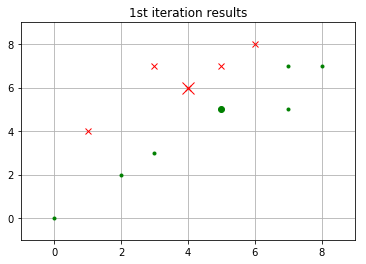

In [2]:
C1 = [1, 4, 5, 9, 11]
C2 = list(set(range(12)) - set(C1))
X0C1, X1C1 = X0[C1], X1[C1]
X0C2, X1C2 = X0[C2], X1[C2]
plt.figure()
plt.title('1st iteration results')
plt.axis([-1, 9, -1, 9])
plt.grid(True)
plt.plot(X0C1, X1C1, 'rx')
plt.plot(X0C2, X1C2, 'g.')
plt.plot(4,6,'rx',ms=12.0)
plt.plot(5,5,'g.',ms=12.0);

Now, we recalculate the centiod of two class, move centriod to the new poisition, recalculate the distance between each sample and new centriod and reclassify the sample according the distacne.

![data_1](images/data_1.png)

The result of drawing are shown as follows：

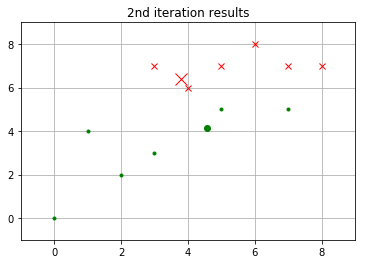

In [3]:
C1 = [1, 2, 4, 8, 9, 11]
C2 = list(set(range(12)) - set(C1))
X0C1, X1C1 = X0[C1], X1[C1]
X0C2, X1C2 = X0[C2], X1[C2]
plt.figure()
plt.title('2nd iteration results')
plt.axis([-1, 9, -1, 9])
plt.grid(True)
plt.plot(X0C1, X1C1, 'rx')
plt.plot(X0C2, X1C2, 'g.')
plt.plot(3.8,6.4,'rx',ms=12.0)
plt.plot(4.57,4.14,'g.',ms=12.0);

Again, we move the center of mass to the new position, recalculate the distance between each sample and the new center of mass, and reclassify the samples according to the distance. The results are shown in the table below:
![data_2](images/data_2.png)

The result of drawing are shown as follows：


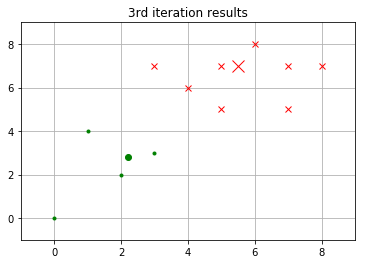

In [4]:
C1 = [0, 1, 2, 4, 8, 9, 10, 11]
C2 = list(set(range(12)) - set(C1))
X0C1, X1C1 = X0[C1], X1[C1]
X0C2, X1C2 = X0[C2], X1[C2]
plt.figure()
plt.title('3rd iteration results')
plt.axis([-1, 9, -1, 9])
plt.grid(True)
plt.plot(X0C1, X1C1, 'rx')
plt.plot(X0C2, X1C2, 'g.')
plt.plot(5.5,7.0,'rx',ms=12.0)
plt.plot(2.2,2.8,'g.',ms=12.0);

The centriod of class will remain the same when repeat the method, K-Means will stop cluster process when the condition are satisfied. Usually, the condition is that the difference value between two cost value of iteration are reaching the set value, or the change of the center of gravity position of the two iterations before and after reaches the limit value. If these stop conditions are small enough, k-means will find the optimal solution. But this is not necessarily the global optimal solution.




## Program

In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
%matplotlib inline

# import necessary libraries
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt


# 1 read from iris.csv
iris_df = pd.read_csv('./iris.csv', header=0, index_col=0)
iris_df.head()


,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# 2 label different kinds of iris to 0, 1, 2

iris_df['class'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0, 1, 2], inplace=True)
iris_df['class']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int64

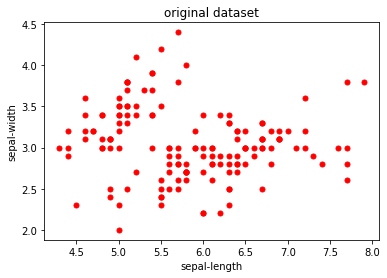

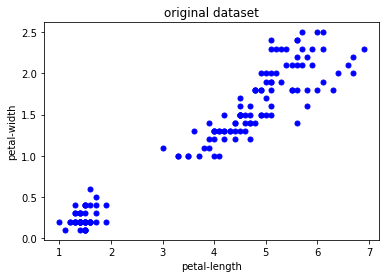

In [2]:
# 2 visualize iris data
def visualizeIris(iris_df, feature='sepal', form='ro', mark_size=5):
    plt.plot(iris_df[feature+'-length'], iris_df[feature+'-width'], form, markersize=mark_size)
    plt.title('original dataset')
    plt.xlabel(feature+'-length')
    plt.ylabel(feature+'-width')
    plt.show()


visualizeIris(iris_df, feature='sepal', form='ro')
visualizeIris(iris_df, feature='petal', form='bo')

In [3]:
# 3 Kmeans algorithm packaging
class KMeans():
    """
        @brief: K-means clustering algorithm for analyzing iris.csv data
        @param: data datasets
        @param: k number of clusetr
        @param: feature feature for clustering(default is 'sepal'，'petal' is optional)
    """

    def __init__(self, data, k=3, feature='sepal'):
        self.color = 'rbckmyw'  # colors for graphics
        self.k = k  # how many clusters
        self.data = data  # save data
        self.feature = feature  # feature for clustring
        self.feature_points = np.array([iris_df[feature+'-length'], iris_df[feature+'-width']]).T # feature
        self.clusters = {key: [] for key in range(self.k)}  # k clusters(null，need to be filled)
        self.centroids = random.sample(list(self.feature_points), k)  # random centroids
        self.count = 0  # record several iterations

    # euclid distance
    def __distance(self, point1, point2):
        return np.sqrt(np.square(np.array(point1) - np.array(point2)).sum())

    # calculate centroids of points
    def __calc_centroids(self, points):
        np_points = np.array(points)
        return np_points.mean(axis=0)

    # visualize data
    def __drawPoints(self, index, cluster, props='ro'):
        # plot centroids
        plt.plot(self.centroids[index][0], self.centroids[index][1], '^', c=self.color[index], ms=14)
        np_cluster = np.array(cluster)  # transfer to numpy array for convenient plotting
        plt.plot(np_cluster[:, 0], np_cluster[:, 1], props)  # plot
        plt.xlabel(self.feature+'-length')
        plt.ylabel(self.feature+'-width')
        plt.grid(True)

    # is programme should stop?
    def __stopable(self, index_list, index_list_his):
        self.count = self.count+1  # count once if checked
        # ignore first time
        if len(index_list) != len(index_list_his):
            return False
        np_index_list = np.array(index_list)
        np_index_list_his = np.array(index_list_his)
        return not np.any(np_index_list-np_index_list_his)

    # generate clusters
    def __cluster(self):
        min_index_list = []
        while True:
            # clear clusters for new iteration
            del self.clusters
            self.clusters = {key: [] for key in range(self.k)}

            min_index_list_his = min_index_list
            min_index_list = []
            for point in self.feature_points:
                # calculate all distance from a point to all centroids and save results to dis
                dis = np.array([])
                for i in range(self.k):
                    dis = np.append(dis, self.__distance(self.centroids[i], point))

                # find min value's index
                min_index = np.argmin(dis)
                min_index_list.append(min_index)
                # clustering
                self.clusters[min_index].append(point)

            # clear old centroids
            self.centroids.clear()
            # calculate new centroids
            for i in range(self.k):
                self.centroids.append(self.__calc_centroids(self.clusters[i]))
                # plot, visualize
                self.__drawPoints(i, self.clusters[i], props=self.color[i]+'.')
            plt.show()

            # if there's no points' index has been changed, then return
            if self.__stopable(min_index_list, min_index_list_his):
                return

    # return final result
    def result(self):
        self.__cluster()

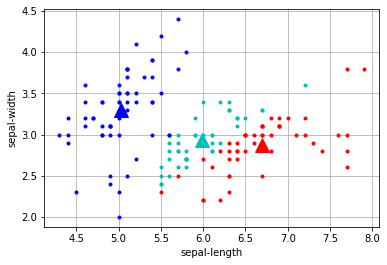

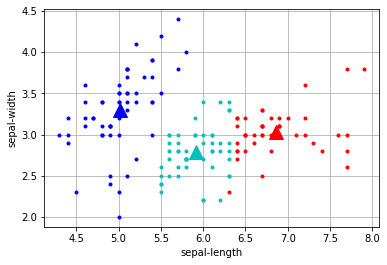

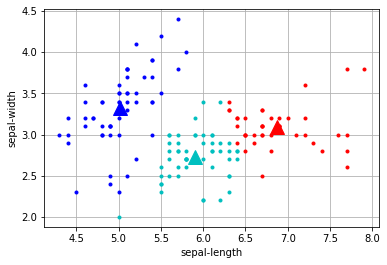

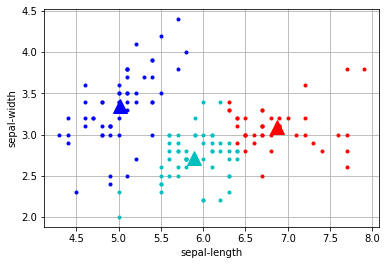

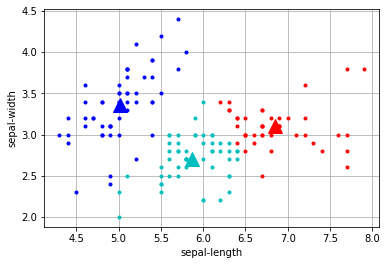

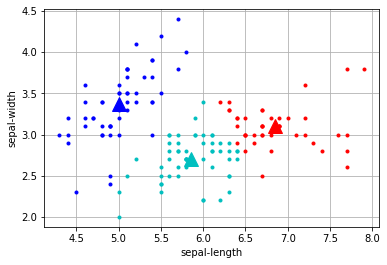

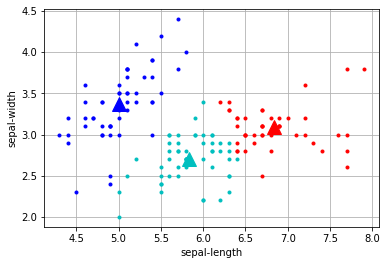

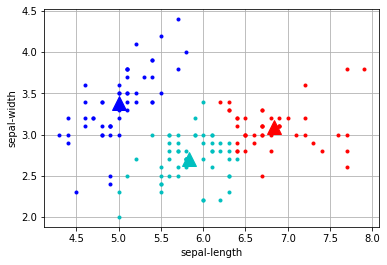

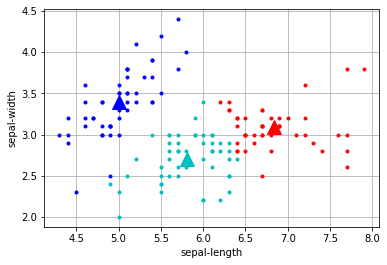

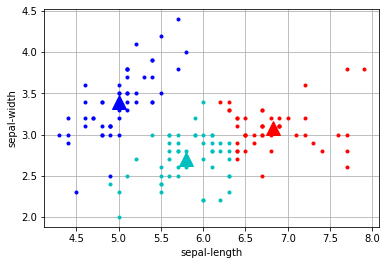

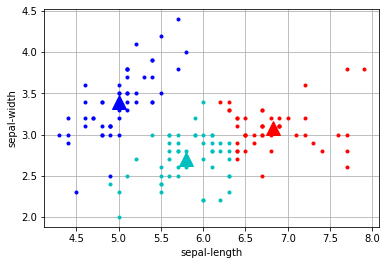

iterated 11 times


In [4]:
k = 3
# iris = KMeans(data=iris_df, k=k, feature='petal') # cluster by petal
iris = KMeans(data=iris_df, k=k, feature='sepal')  # clusetr by sepal
iris.result()
print('iterated', iris.count, 'times')

## How to use sklearn to do the classifiction


<Figure size 432x288 with 0 Axes>

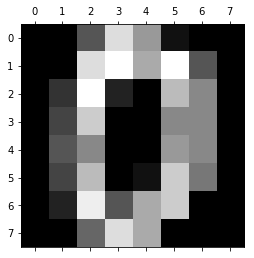

In [17]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

# load digital data
digits, dig_label = load_digits(return_X_y=True)

# draw one digital
plt.gray() 
plt.matshow(digits[0].reshape([8, 8])) 
plt.show() 

# calculate train/test data number
N = len(digits)
N_train = int(N*0.8)
N_test = N - N_train

# split train/test data
x_train = digits[:N_train, :]
y_train = dig_label[:N_train]
x_test  = digits[N_train:, :]
y_test  = dig_label[N_train:]



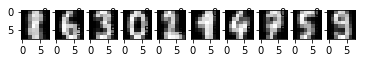

In [21]:
# do kmeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(x_train)

# kmeans.labels_ - output label
# kmeans.cluster_centers_ - cluster centers

# draw cluster centers
fig, axes = plt.subplots(nrows=1, ncols=10)
for i in range(10):
    img = kmeans.cluster_centers_[i].reshape(8, 8)
    axes[i].imshow(img)


## Exerciese - How to caluate the accuracy?

1. How to match cluster label to groundtruth label
2. How to solve the uncertainty of some digital

## Value the performance of cluster

Mehtod 1: If the data that has been valued have correct categories data, then use Adjusted Rand Index(ARI), ARI is similar to the method for accuracy calculating which considered the problem that the class cluster cannot correspond to the classification tag.




In [29]:
from sklearn.metrics import adjusted_rand_score

ari_train = adjusted_rand_score(y_train, kmeans.labels_)
print("ari_train = %f" % ari_train)

ari_train = 0.687021


Given the contingency table:
![ARI_ct](images/ARI_ct.png)

the adjusted index is:
![ARI_define](images/ARI_define.png)

* [ARI reference](https://davetang.org/muse/2017/09/21/adjusted-rand-index/)

Method 2: if the value that has been evaluated do not have categories, Silhouette Coefficient will be used to evaluate the performance of cluster result. **Silhouette Coefficient take into account both the cohesion and the separation of the clusters, the value range is [-1,1], the higher Silhouette Coefficient represent the better clustering effect will be** 

Detailed steps for calculating Silhouette Coefficient
1. For the ith smapel in the clusterded data$x_i$, calculate the average value between $x_i$ and all the other smaple in the same cluster, written as $a_i$, used to quantify the cohesion within a cluster
2. Choose a cluster $b$ outside of $x_i$, calculate the average distance between $x_i$ and all samples in cluster $b$, traverse all other cluster, find the closest average distance and noted as $b_i$, which can be used to quantify the degree of separation between clusters.
3. For sample $x_i$, Silhouette Coefficient is $sc_i = \frac{b_i−a_i}{max(b_i,a_i)}$ 
4. Finally, calculate average value for all sample $\mathbf{X}$, which will be the Silhouette Coefficient for current cluster result.

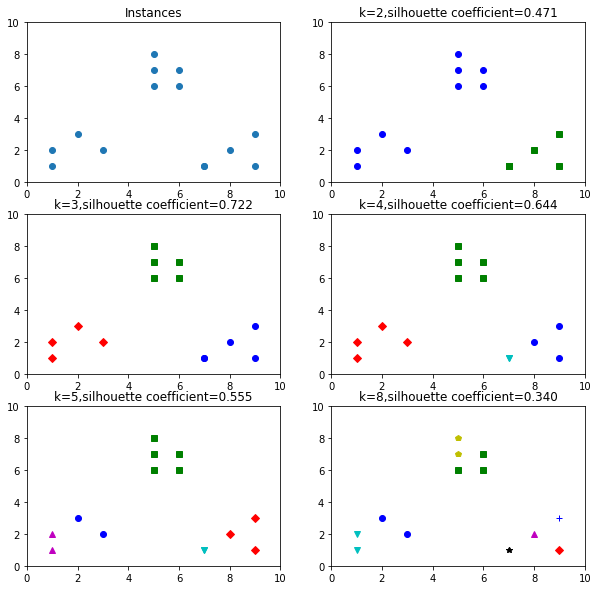

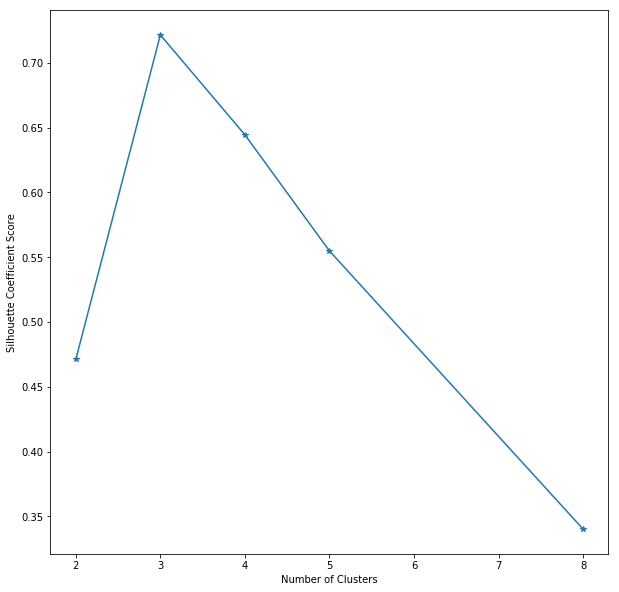

In [12]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(10,10)
plt.subplot(3,2,1)

x1=np.array([1,2,3,1,5,6,5,5,6,7,8,9,7,9])   #Initialize original data
x2=np.array([1,3,2,2,8,6,7,6,7,1,2,1,1,3])
X=np.array(list(zip(x1,x2))).reshape(len(x1),2)

plt.xlim([0,10])
plt.ylim([0,10])
plt.title('Instances')
plt.scatter(x1,x2)

colors=['b','g','r','c','m','y','k','b']
markers=['o','s','D','v','^','p','*','+']

clusters=[2,3,4,5,8]
subplot_counter=1
sc_scores=[]
for t in clusters:
    subplot_counter +=1
    plt.subplot(3,2,subplot_counter)
    kmeans_model=KMeans(n_clusters=t).fit(X)   #KMeans modeling

    for i,l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i],x2[i],color=colors[l],marker=markers[l],ls='None')

    plt.xlim([0,10])
    plt.ylim([0,10])

    sc_score=silhouette_score(X,kmeans_model.labels_,metric='euclidean')   #Calculate Silhouette Coefficient
    sc_scores.append(sc_score)

    plt.title('k=%s,silhouette coefficient=%0.03f'%(t,sc_score))

plt.figure()
plt.plot(clusters,sc_scores,'*-')   #Draw the relationship between cluster numbers and corresponding Silhouette Coefficient
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient Score')

plt.show()   

## How to determin the 'k'?

Using "Elbow observation" can cursely determine the relatively reasonable numbers of cluster. K-means modeling are ultimately expecting that the sum of squares between all data points and their class clusters to be stable, so we could find best cluster numbers by observing this value. Under ideal condition, this broken line has an inflection point of slope as it falls and flattens out, this represents that from the K value that this inflection point represents, the increase of cluster center will not extremely broken the cluster inner structure.



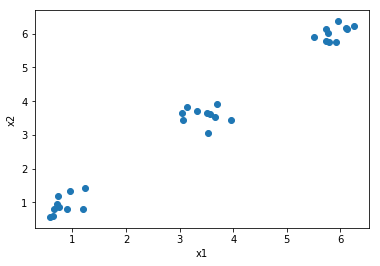

In [2]:
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

cluster1=np.random.uniform(0.5,1.5,(2,10))
cluster2=np.random.uniform(5.5,6.5,(2,10))
cluster3=np.random.uniform(3,4,(2,10))

X=np.hstack((cluster1,cluster2,cluster3)).T
plt.scatter(X[:,0],X[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

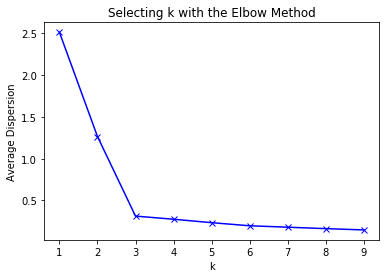

In [3]:
K=range(1,10)
meandistortions=[]

for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(\
            sum(np.min(cdist(X,kmeans.cluster_centers_,'euclidean'),\
                       axis=1))/X.shape[0])

plt.plot(K,meandistortions,'bx-')
plt.xlabel('k')
plt.ylabel('Average Dispersion')
plt.title('Selecting k with the Elbow Method')
plt.show()

As can be seen from the figure above, in the process that cluster number decrease from 1 to 2 and 3, the change of K value can make a big difference to the whole cluster structure, which means new cluster number make algorithm have larger convergence space and this K means can not represent real cluster members. When K=3, if we increase K, the decrease speed of average distance are slow down obviously, which means that a further increase in K is no longer conducive to the convergence of the algorithm, at the same time, it also mplies that K=3 is the relative optimal number of class clusters
